In [50]:
import scanpy as sc
import pandas
import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [8]:
adata = sc.read_h5ad('./data/multiome_human_scrna.h5ad')

In [13]:
celltype_colors = dict(zip(adata.obs['combat_celltype'].cat.categories, adata.uns['combat_celltype_colors']))

/tmp/ipykernel_1338045/3142264640.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['combat_celltype', 'tissue']).size().reset_index(name='count')


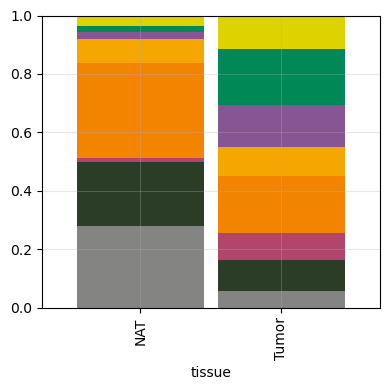

In [16]:
df = adata.obs.copy()
#df = df[df['tissue'] != 'NAT']
df['tissue'] = df['tissue'].values.tolist()
celltype_order = ['IL10+ Treg', 'IL10- Treg', 'Cytotoxic CD4', 'PD1+ CD4', 'CCR7+ T', 'PD1+ CD8', 'Cytotoxic CD8',
                  'Cytotoxic gdT'
                  ]
celltype_order.reverse()

df = adata.obs.copy()
#df = df[df['tissue'] != 'NAT']
df['tissue'] = df['tissue'].values.tolist()
df = df.groupby(['combat_celltype', 'tissue']).size().reset_index(name='count')
df['combat_celltype'] = pandas.Categorical(df['combat_celltype'].values.tolist(),  
                   categories=celltype_order)
df = df.pivot(index='tissue', columns='combat_celltype', values='count')
df = df.iloc[::-1]
df_sum = df.sum(1).values.copy()
for c in df.columns: df[c] = df[c].values/df_sum
df = df.iloc[::-1]

fig = plt.figure(figsize=(4,4))
df.plot.bar(stacked=True, color=celltype_colors, width=0.9, ax=plt.gca()) # , ax=ax[1])
plt.gca().set_ylabel("")
plt.subplots_adjust(wspace=0, hspace=0)
plt.gca().get_legend().remove()
plt.gca().grid(visible=True, alpha=0.3)
plt.ylim((0, 1))
plt.tight_layout()

/tmp/ipykernel_1338045/1724249108.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['combat_celltype', 'batch']).size().reset_index(name='count')


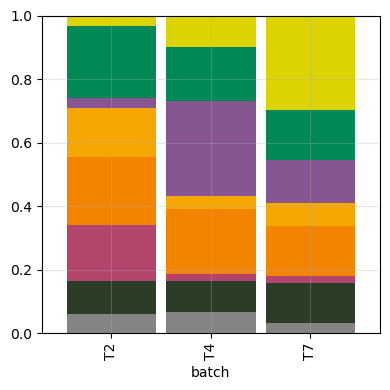

In [14]:
df = adata.obs.copy()
df = df[df['tissue'] != 'NAT']
df['batch'] = df['batch'].values.tolist()
celltype_order = ['IL10+ Treg', 'IL10- Treg', 'Cytotoxic CD4', 'PD1+ CD4', 'CCR7+ T', 'PD1+ CD8', 'Cytotoxic CD8',
                  'Cytotoxic gdT'
                  ]
celltype_order.reverse()

df = adata.obs.copy()
df = df[df['tissue'] != 'NAT']
df['batch'] = df['batch'].values.tolist()
df = df.groupby(['combat_celltype', 'batch']).size().reset_index(name='count')
df['combat_celltype'] = pandas.Categorical(df['combat_celltype'].values.tolist(),  
                   categories=celltype_order)
df = df.pivot(index='batch', columns='combat_celltype', values='count')
df = df.iloc[::-1]
df_sum = df.sum(1).values.copy()
for c in df.columns: df[c] = df[c].values/df_sum
df = df.iloc[::-1]

fig = plt.figure(figsize=(4,4))
df.plot.bar(stacked=True, color=celltype_colors, width=0.9, ax=plt.gca()) # , ax=ax[1])
plt.gca().set_ylabel("")
plt.subplots_adjust(wspace=0, hspace=0)
plt.gca().get_legend().remove()
plt.gca().grid(visible=True, alpha=0.3)
plt.ylim((0, 1))
plt.tight_layout()

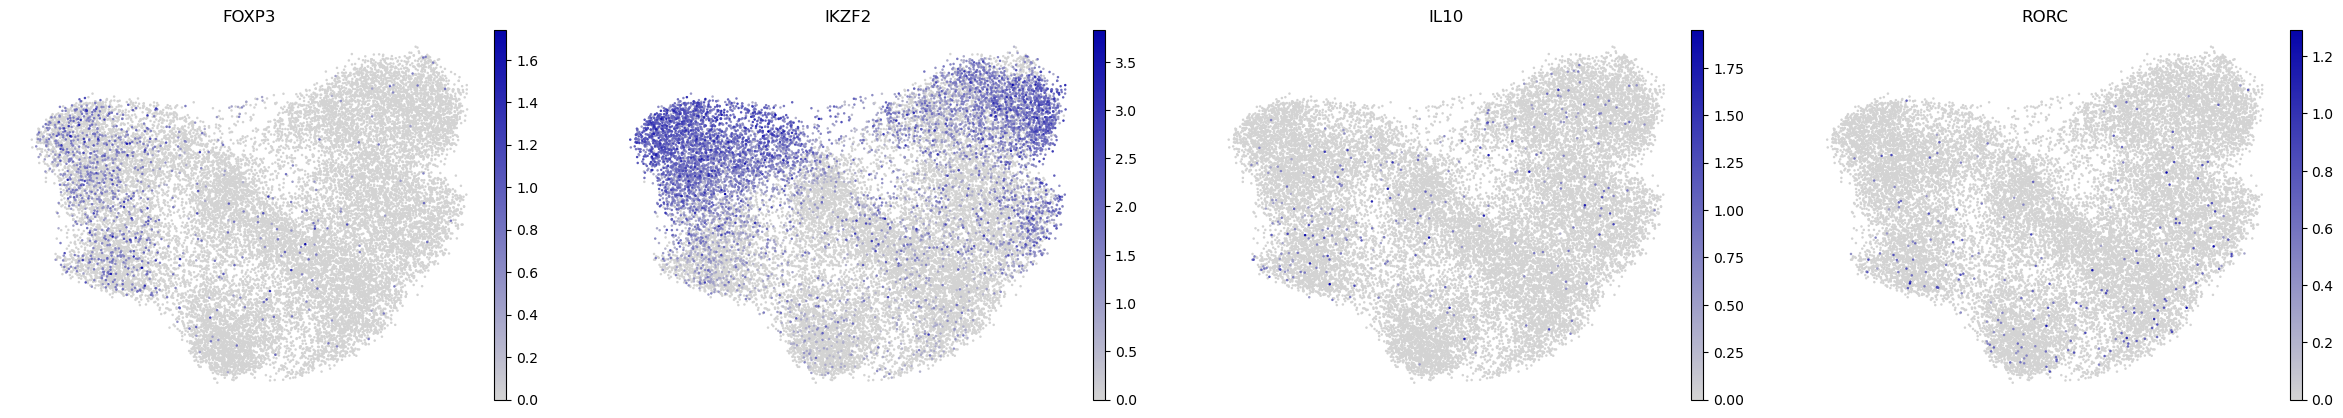

In [19]:
sc.pl.embedding(adata, color=['FOXP3', 'IKZF2', 'IL10', 'RORC'], basis='X_combat_umap', s=13, use_raw=False,
               cmap=seaborn.blend_palette(["lightgray", seaborn.xkcd_rgb["royal blue"]], as_cmap=True), frameon=False)

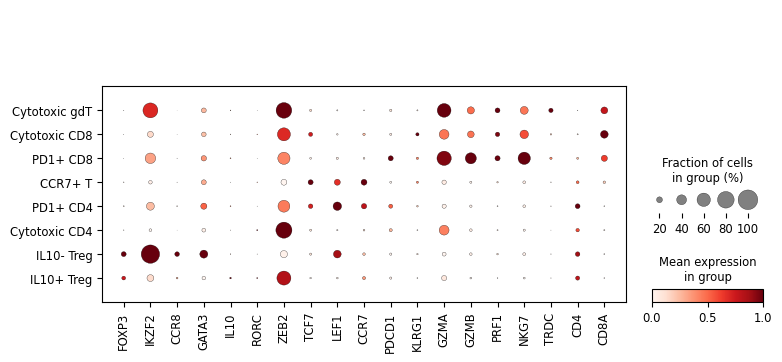

In [20]:
sc.pl.dotplot(adata, ['FOXP3', 'IKZF2', 'CCR8', 'GATA3', 'IL10', 'RORC', 
                      'ZEB2', 'TCF7', 'LEF1', 'CCR7', 'PDCD1', 'KLRG1', 'GZMA', 'GZMB', 
                      'PRF1', 'NKG7', 'TRDC', 'CD4', 'CD8A'], groupby='combat_celltype',
             categories_order=celltype_order, standard_scale='var')

In [25]:
adata_flex = sc.read_h5ad('./data/flex_10x.h5ad')

In [46]:
pal = {'B cells': '#1f77b4',
 'CAF-AB': '#ff7f0e',
 'CAF-B': '#279e68',
 'DC': '#d62728',
 'IL10+ Treg': '#DCD300',
 'IL10- Treg': '#008856',
 'PD1+ CD4': (0.4, 0.7607843137254902, 0.6470588235294118), # '#e377c2',
 #'PD1+ CD8': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), # '#b5bd61',
 'ILCTKs': (0.5529411764705883, 0.6274509803921569, 0.796078431372549), # '#17becf',
 'fibroblast': '#aec7e8',
 'gdT': '#848482', #(0.9058823529411765, 0.5411764705882353, 0.7647058823529411), # '#ffbb78',
 'goblet': '#98df8a',
 'goblet/fibroblast': '#ff9896',
 'immune mixed': '#c5b0d5',
 'SPP1+_macrophage': '#c49c94',
 'SELENOP+_macrophage': '#9467bd',
 'DC': '#8c564b',
 'neutrophils': '#e377c2',
 'Tfh': '#882D17',
 'Th17': '#8DB600',
 'other': 'lightgrey',
 'PD1+ CD8': '#B3446C',
 'inflammatory_monocytes': '#17becf',
 'CD4 memory': '#F6A600', # (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), # '#f7b6d2',
 'other T': '#dbdb8d',
 'plasmablast': '#9edae5',
 'tumor': '#ad494a'}

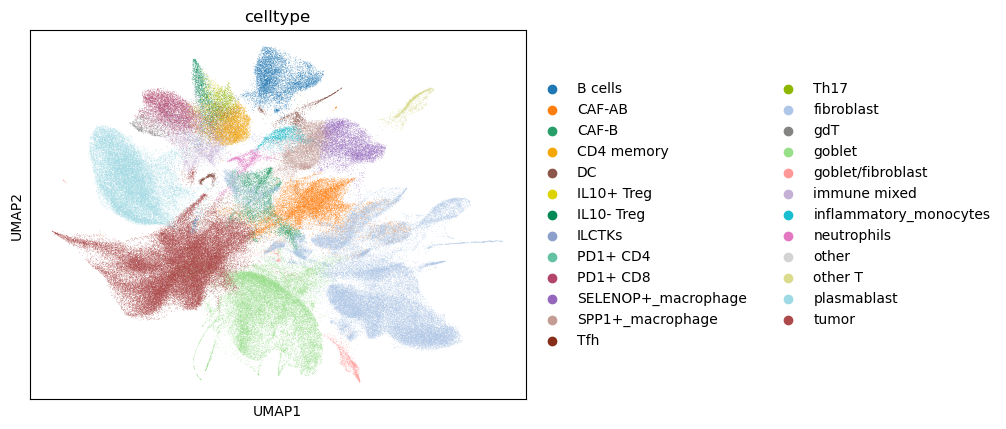

In [56]:
# plot all
sc.pl.umap(adata_flex, color='celltype', palette=pal)

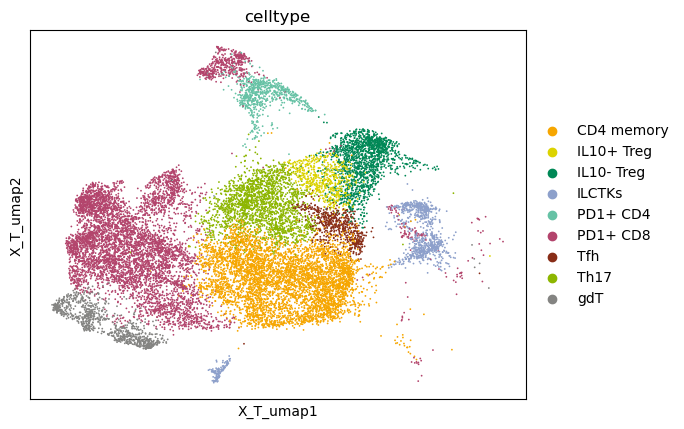

In [58]:
# plot T cells
sc.pl.embedding(adata_flex[adata_flex.obs['celltype'].isin(['CD4 memory', 'IL10+ Treg', 'IL10- Treg', 
                                                            'ILCTKs', 'PD1+ CD4', 'PD1+ CD8', 'Tfh', 
                                                            'Th17', 'gdT'])],
                color='celltype', basis='X_T_umap')

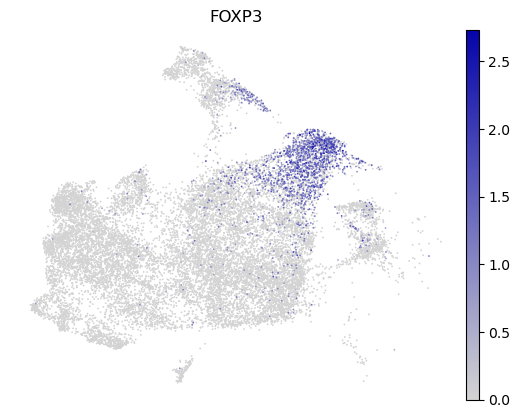

In [72]:
sc.pl.embedding(adata_flex[adata_flex.obs['celltype'].isin(['CD4 memory', 'IL10+ Treg', 'IL10- Treg', 
                                                            'ILCTKs', 'PD1+ CD4', 'PD1+ CD8', 'Tfh', 
                                                            'Th17', 'gdT'])], color='FOXP3', basis='X_T_umap',
           cmap=seaborn.blend_palette(["lightgray", seaborn.xkcd_rgb["royal blue"]], as_cmap=True), frameon=False)

/tmp/ipykernel_1338045/2600898054.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  seaborn.countplot(data=df, y='celltype', ax=ax[0],
/tmp/ipykernel_1338045/2600898054.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['celltype', 'tissue']).size().reset_index(name='count')


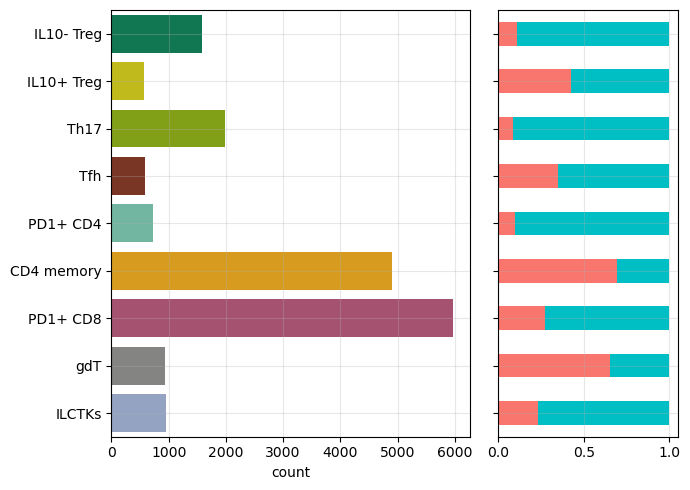

In [87]:
df = adata_flex[adata_flex.obs['celltype'].isin(['CD4 memory', 'IL10+ Treg', 'IL10- Treg', 
                                                            'ILCTKs', 'PD1+ CD4', 'PD1+ CD8', 'Tfh', 
                                                            'Th17', 'gdT'])].obs.copy()
celltype_order = ['ILCTKs', 'gdT', 'PD1+ CD8', 'CD4 memory', 'PD1+ CD4', 'Tfh', 'Th17', 'IL10+ Treg', 'IL10- Treg']
celltype_order.reverse()
df['celltype'] = pandas.Categorical(df['celltype'].values.tolist(),  
                   categories=celltype_order)

fig, ax = plt.subplots(1, 2, figsize=(7, 5), gridspec_kw={'width_ratios': [2, 1]}) 
seaborn.countplot(data=df, y='celltype', ax=ax[0],
                  palette=pal) 
df = adata_flex[adata_flex.obs['celltype'].isin(['CD4 memory', 'IL10+ Treg', 'IL10- Treg', 
                                                            'ILCTKs', 'PD1+ CD4', 'PD1+ CD8', 'Tfh', 
                                                            'Th17', 'gdT'])].obs.copy()
df['celltype'] = pandas.Categorical(df['celltype'].values.tolist(),  
                   categories=celltype_order)
df['tissue'] = pandas.Categorical(df['tissue'].values.tolist(),  
                   categories=['NAT', 'CRC'])
df = df.groupby(['celltype', 'tissue']).size().reset_index(name='count')
df = df.pivot(index='celltype', columns='tissue', values='count')
df = df.iloc[::-1]
df_sum = df.sum(1).values.copy()
df['CRC'] = df['CRC'].values/df_sum
df['NAT'] = df['NAT'].values/df_sum
df.plot.barh(stacked=True, color={'NAT': '#F8766D', 'CRC': '#00BFC4'}, ax=ax[1])
ax[1].set_yticklabels([])
ax[1].set_ylabel("")
ax[0].set_ylabel("")
plt.subplots_adjust(wspace=0, hspace=0)
ax[1].get_legend().remove()
ax[0].grid(visible=True, alpha=0.3)
ax[1].grid(visible=True, alpha=0.3)
plt.tight_layout()

/tmp/ipykernel_1338045/2184223145.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


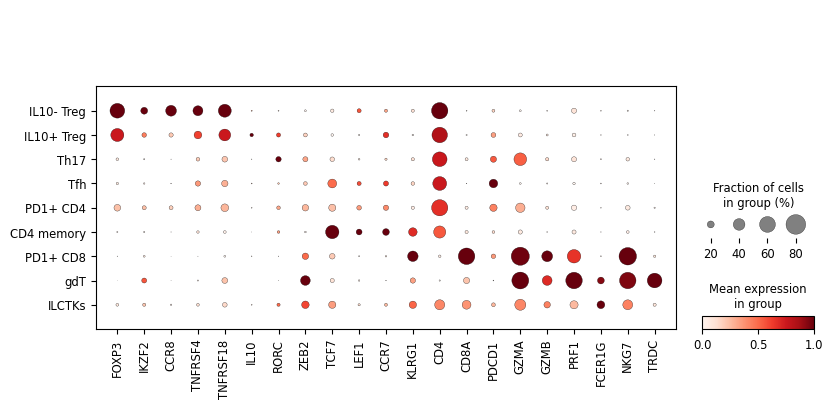

In [89]:
sc.pl.dotplot(adata_flex[adata_flex.obs['celltype'].isin(['CD4 memory', 'IL10+ Treg', 'IL10- Treg', 
                                                            'ILCTKs', 'PD1+ CD4', 'PD1+ CD8', 'Tfh', 
                                                            'Th17', 'gdT'])], 
              ['FOXP3', "IKZF2", "CCR8", "TNFRSF4", "TNFRSF18", "IL10", 'RORC',
                           'ZEB2', 'TCF7', 'LEF1', 'CCR7', 'KLRG1', 'CD4', 'CD8A', 'PDCD1', 'GZMA',
              'GZMB', 'PRF1', 'FCER1G', 'NKG7', 'TRDC'], groupby='celltype', show=False,
             categories_order=celltype_order, standard_scale='var') 
plt.tight_layout()